In [23]:
import json

def write_json(dict, label): # wirte the new state into new txt file
    file_name_output=label+'.json'
    print('saving file:',file_name_output)
    with open(file_name_output, 'w') as f:
        json.dump(dict, f)

def write_txt(content, label): # wirte the new state into new txt file
    file_name_output=label+'.txt'
    print('saving file:',file_name_output)
    with open(file_name_output, 'w') as f:
        f.write(content)


In [24]:
from glob import glob
import os
import math
from matplotlib import pyplot
import tensorflow as tf
import numpy as np

def get_labels(path_):
    return os.listdir(path_)

def get_counts(path_):
    return len(list(glob(path_+'\\*.jpg')))

def crop_num(ratio_, size_=84):
    ten=int(ratio_*10)
    one=int(ratio_*100)-ten*10
    if one > 5:
        one = 0
        ten += 1
    else:
        one = 5
    ratio_ = (ten*10 + one)/100
    diameter = int(math.sqrt(size_*size_*(1-ratio_)/math.pi))*2
    return (size_-diameter)//2

def find_ratio(image):
    black_count=0
    dict_img = pyplot.imread(image)
    unique, counts = np.unique(dict_img, return_counts=True)
    if unique[0] == 0:
        black_count=counts[0]/counts.sum()
    return black_count

def crop_resize(image, ratio_):
    name_=image.split('\\')[6]
    file_name=f'.\\output\\{name_}'
    off_set = crop_num(ratio_, 84)
    print('resizing image', name_, 'ratio', ratio_, 'off_set', off_set)
    
    data = pyplot.imread(image)
    my_dpi=84
    css=110
    pyplot.figure(figsize=(css/my_dpi, css/my_dpi), dpi=my_dpi)
    pyplot.imshow(np.array(data, dtype=int))
    pyplot.show()
    
    cropped_image = tf.image.crop_to_bounding_box(data, off_set, off_set, 84-off_set*2, 84-off_set*2)
    resized_image = tf.image.resize(images=cropped_image, size=[84,84], method=tf.image.ResizeMethod.BILINEAR, antialias=True, name=None)

    pyplot.figure(figsize=(css/my_dpi, css/my_dpi), dpi=my_dpi)
    pyplot.imshow(np.array(resized_image, dtype=int))
    pyplot.axis('off')
    pyplot.savefig(file_name, bbox_inches='tight', pad_inches=0)
    pyplot.show()
    return file_name
    
    
def black_check(path_, low_, high_):
    # revd_images = {}
    white_list=[]
    revd_list = []
    black_list = []
    # label=path_.split('\\')[4]
    # off_set=0
    images = glob(path_+'\\*.jpg')
    for image in images:
        ratio_ = find_ratio(image)
        if ratio_<low_:
            continue
        elif ratio_>high_:
            black_list.append(image)
            continue
        else:
            # print('resizing image', image.split('\\')[6], 'ratio', ratio_)
            white_name = crop_resize(image, ratio_)
            revd_list.append(image)
            white_list.append(white_name)
    # revd_images[label]=temp_list
    return revd_list, white_list, black_list


In [25]:
ratio_=0.5
print(crop_num(ratio_))

11


In [26]:
path_='.\\Topic_5_Data\\ISIC84by84\\train\\'
labels = get_labels(path_)
img_path = path_+labels[0]
images = glob(img_path+'\\*.jpg')
image=images[0]
print(images[0])
print(images[0].split('\\')[5])
dict_img = pyplot.imread(image)
unique, counts = np.unique(dict_img, return_counts=True)
print(unique[0],counts[0])
# ratio_ = find_ratio(image)
# print(ratio_)

.\Topic_5_Data\ISIC84by84\train\AK\ISIC_0024468.jpg
ISIC_0024468.jpg
55 1


finding black background noise of DF
processing total 139 images files
saving file: .\output\dict_resized_DF.json
finding black background noise of VASC
processing total 153 images files
saving file: .\output\dict_resized_VASC.json
finding black background noise of SCC
processing total 528 images files
resizing image ISIC_0054515.jpg ratio 0.5173374905517762 off_set 11


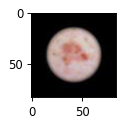

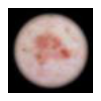

resizing image ISIC_0057890.jpg ratio 0.5057161753590325 off_set 11


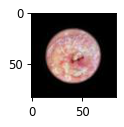

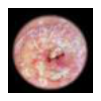

saving file: .\output\dict_resized_SCC.json
finding black background noise of AK
processing total 735 images files
resizing image ISIC_0059874.jpg ratio 0.5446900982615268 off_set 11


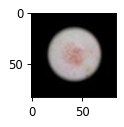

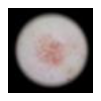

resizing image ISIC_0064583.jpg ratio 0.5280612244897959 off_set 11


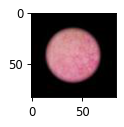

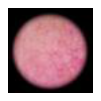

resizing image ISIC_0071605.jpg ratio 0.5062358276643991 off_set 11


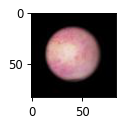

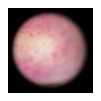

saving file: .\output\dict_resized_AK.json
finding black background noise of BKL
processing total 2524 images files
resizing image ISIC_0056312.jpg ratio 0.5325018896447468 off_set 11


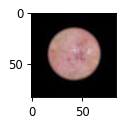

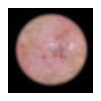

resizing image ISIC_0060105.jpg ratio 0.5416666666666666 off_set 11


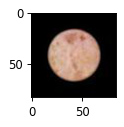

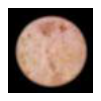

saving file: .\output\dict_resized_BKL.json
finding black background noise of BCC
processing total 3223 images files
resizing image ISIC_0055119.jpg ratio 0.510818216175359 off_set 11


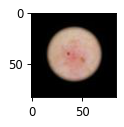

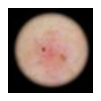

resizing image ISIC_0055762.jpg ratio 0.5319349962207105 off_set 11


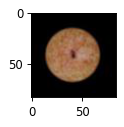

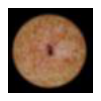

resizing image ISIC_0055951.jpg ratio 0.5070861678004536 off_set 11


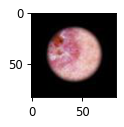

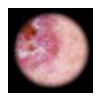

resizing image ISIC_0056219.jpg ratio 0.5028344671201814 off_set 11


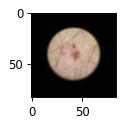

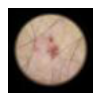

resizing image ISIC_0056291.jpg ratio 0.5008503401360545 off_set 11


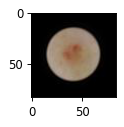

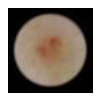

resizing image ISIC_0056696.jpg ratio 0.5129440665154951 off_set 11


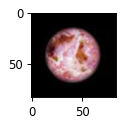

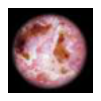

resizing image ISIC_0057255.jpg ratio 0.5125661375661376 off_set 11


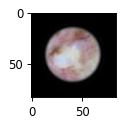

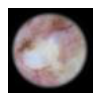

resizing image ISIC_0059997.jpg ratio 0.5304232804232805 off_set 11


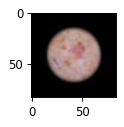

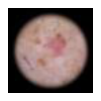

resizing image ISIC_0060683.jpg ratio 0.5146919879062736 off_set 11


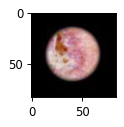

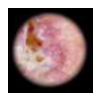

resizing image ISIC_0060931.jpg ratio 0.5189909297052154 off_set 11


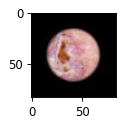

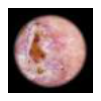

resizing image ISIC_0063231.jpg ratio 0.5321239606953893 off_set 11


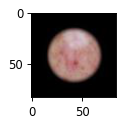

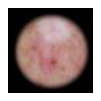

resizing image ISIC_0063406.jpg ratio 0.5306594860166288 off_set 11


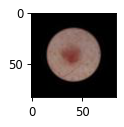

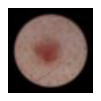

resizing image ISIC_0063720.jpg ratio 0.5024092970521542 off_set 11


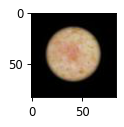

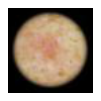

resizing image ISIC_0064293.jpg ratio 0.5056689342403629 off_set 11


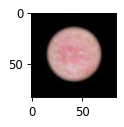

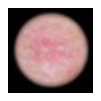

resizing image ISIC_0065028.jpg ratio 0.513274754346183 off_set 11


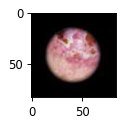

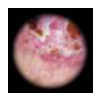

resizing image ISIC_0066062.jpg ratio 0.5248960695389266 off_set 11


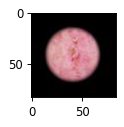

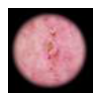

resizing image ISIC_0066210.jpg ratio 0.5265022675736961 off_set 11


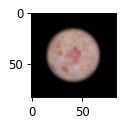

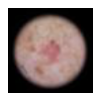

resizing image ISIC_0066760.jpg ratio 0.5498866213151927 off_set 11


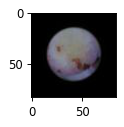

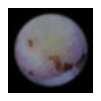

resizing image ISIC_0068186.jpg ratio 0.5402021919879063 off_set 11


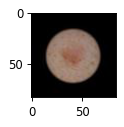

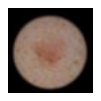

resizing image ISIC_0069215.jpg ratio 0.5087868480725624 off_set 11


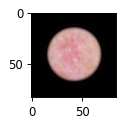

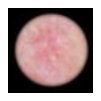

resizing image ISIC_0070975.jpg ratio 0.545115268329554 off_set 11


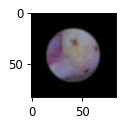

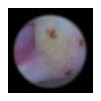

resizing image ISIC_0071461.jpg ratio 0.5058578987150416 off_set 11


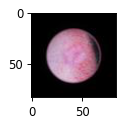

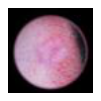

saving file: .\output\dict_resized_BCC.json
finding black background noise of MEL
processing total 4422 images files
resizing image ISIC_0054409.jpg ratio 0.5025037792894935 off_set 11


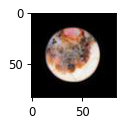

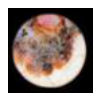

resizing image ISIC_0054625.jpg ratio 0.5171485260770975 off_set 11


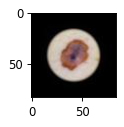

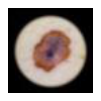

resizing image ISIC_0054710.jpg ratio 0.5211640211640212 off_set 11


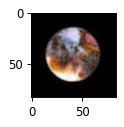

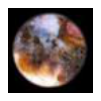

resizing image ISIC_0056915.jpg ratio 0.5028344671201814 off_set 11


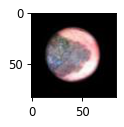

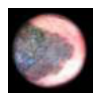

resizing image ISIC_0057218.jpg ratio 0.5179988662131519 off_set 11


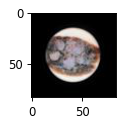

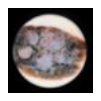

resizing image ISIC_0058876.jpg ratio 0.5389739229024944 off_set 11


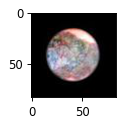

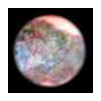

resizing image ISIC_0063428.jpg ratio 0.5180933484504913 off_set 11


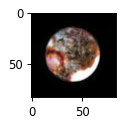

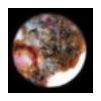

resizing image ISIC_0065089.jpg ratio 0.5120937263794406 off_set 11


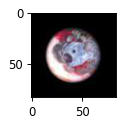

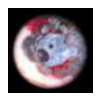

resizing image ISIC_0068545.jpg ratio 0.5214474678760394 off_set 11


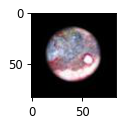

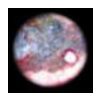

resizing image ISIC_0068932.jpg ratio 0.5409580498866213 off_set 11


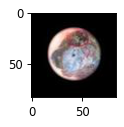

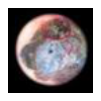

saving file: .\output\dict_resized_MEL.json
finding black background noise of NV
processing total 12775 images files
resizing image ISIC_0055139.jpg ratio 0.520124716553288 off_set 11


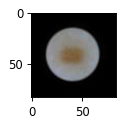

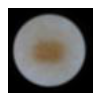

resizing image ISIC_0058606.jpg ratio 0.52286470143613 off_set 11


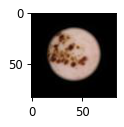

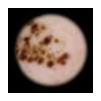

resizing image ISIC_0059468.jpg ratio 0.5052910052910053 off_set 11


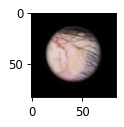

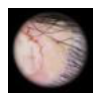

resizing image ISIC_0066510.jpg ratio 0.5496031746031746 off_set 11


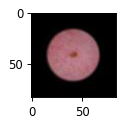

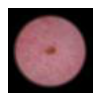

resizing image ISIC_0068130.jpg ratio 0.513416477702192 off_set 11


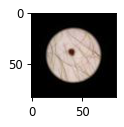

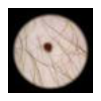

resizing image ISIC_0069450.jpg ratio 0.5265967498110355 off_set 11


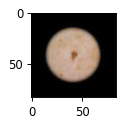

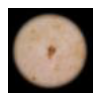

resizing image ISIC_0070203.jpg ratio 0.5395880574452003 off_set 11


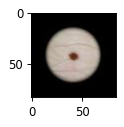

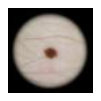

resizing image ISIC_0072822.jpg ratio 0.5652872260015117 off_set 13


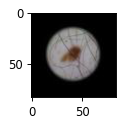

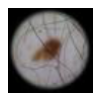

saving file: .\output\dict_resized_NV.json


In [27]:
path_='.\\Topic_5_Data\\ISIC84by84\\train\\'
# labels = get_labels(path_)

labels = ['DF','VASC','SCC','AK','BKL','BCC','MEL','NV'] 

for label in labels:
    revd_images = {}
    path_temp= f'{path_}{label}\\'
    print(f'finding black background noise of {label}')
    print(f'processing total {get_counts(path_temp)} images files')
    revd_list, white_list, black_list = black_check(path_temp, 0.5, 0.7)
    revd_images[label]=[revd_list, white_list, black_list]
    write_json(revd_images, f'.\\output\\dict_resized_{label}')
    # show_line(outliers_path_)



In [28]:
# img = imread(path_)
# count_equal = tf.equal(img, tf.constant([0.,0.,0.]))
# as_ints = tf.cast(count_equal, tf.int32)
# count = tf.reduce_sum(as_ints)
# print(round(100*int(count)/21168,2),'%')